Mean Squared Error: 0.06833487580646659
R-squared: 0.8436639739417213
Marks_Range
(10, 20]          NaN
(20, 30]          NaN
(30, 40]     7.207000
(40, 50]     7.970652
(50, 60]          NaN
(60, 70]          NaN
(70, 80]          NaN
(80, 90]          NaN
(90, 100]         NaN
Name: GPA, dtype: float64


<ipython-input-2-023f69b0ceb3>:61: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  gpa_analysis = data.groupby('Marks_Range')[y.name].mean()


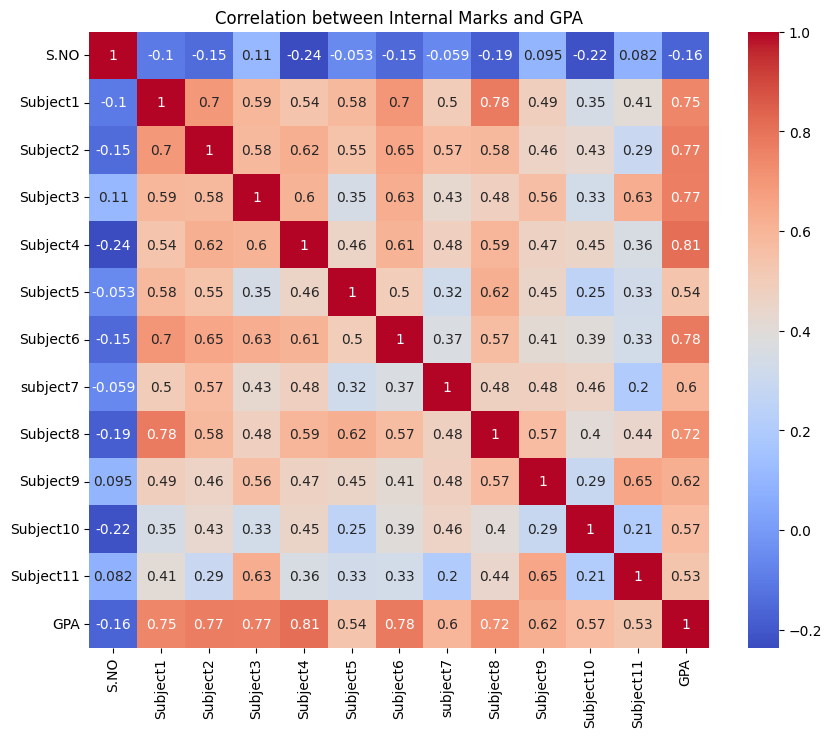

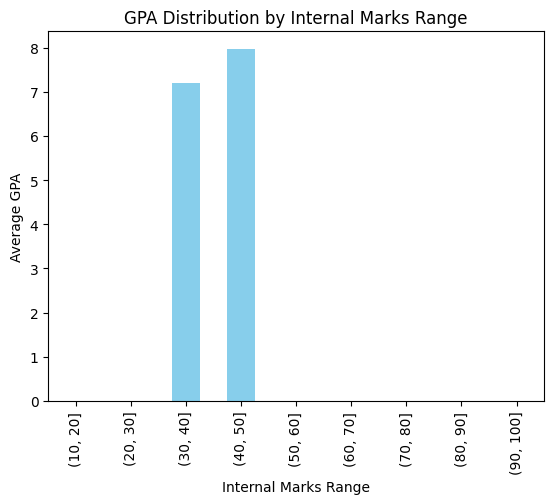

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load the dataset
data = pd.read_csv('sem.csv')

# Step 2: Preprocess the data
# Assuming the last column is the GPA and all others are internal marks
X = data.iloc[:, :-1]  # Features (internal marks)
y = data.iloc[:, -1]   # Target (GPA)

# Handling missing values if any
X.fillna(X.mean(), inplace=True)

# Normalize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Step 4: Create the model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 5: Predict the GPA on the test set
y_pred = model.predict(X_test)

# Model evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# Step 6: Load new semester internal marks and predict GPA
# Load the new data (assuming it's in the same format)
new_data = pd.read_csv('sem.csv')
new_data_X = new_data.iloc[:, :-1]# Replace with actual path
#new_data_X = new_data_X.drop('GPA',axis=1)
new_data_scaled = scaler.transform(new_data_X)
predicted_gpa = model.predict(new_data_scaled)

# Save the predicted GPA to a CSV file
pd.DataFrame(predicted_gpa, columns=['Predicted_GPA']).to_csv('/content/predicted.csv', index=False)

# Step 7: Analyze the results
# Correlation between internal marks and GPA
correlation = data.corr()
#print(correlation)

# GPA distribution analysis based on internal marks
ranges = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
data['Marks_Range'] = pd.cut(data.iloc[:, :-1].mean(axis=1), bins=ranges)
gpa_analysis = data.groupby('Marks_Range')[y.name].mean()

print(gpa_analysis)

# Plotting the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation between Internal Marks and GPA')
plt.show()

# Plotting GPA distribution
gpa_analysis.plot(kind='bar', color='skyblue')
plt.title('GPA Distribution by Internal Marks Range')
plt.xlabel('Internal Marks Range')
plt.ylabel('Average GPA')
plt.show()


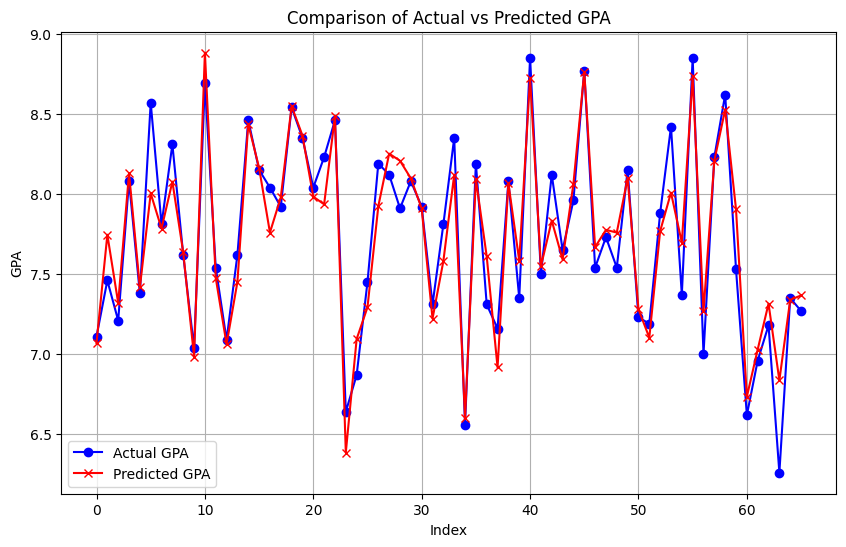

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load the dataset
data = pd.read_csv('/content/sem_result.csv')

# Assuming the file has columns 'Actual_GPA' and 'Predicted_GPA'
# If the column names differ, replace them accordingly
actual_gpa = data['GPA']
predicted_gpa = data['Predicted_GPA']

# Step 2: Plot the comparison graph
plt.figure(figsize=(10, 6))
plt.plot(actual_gpa, label='Actual GPA', color='blue', marker='o')
plt.plot(predicted_gpa, label='Predicted GPA', color='red', marker='x')
plt.title('Comparison of Actual vs Predicted GPA')
plt.xlabel('Index')
plt.ylabel('GPA')
plt.legend()
plt.grid(True)
plt.show()


Predicted_GPA    8.881466
dtype: float64


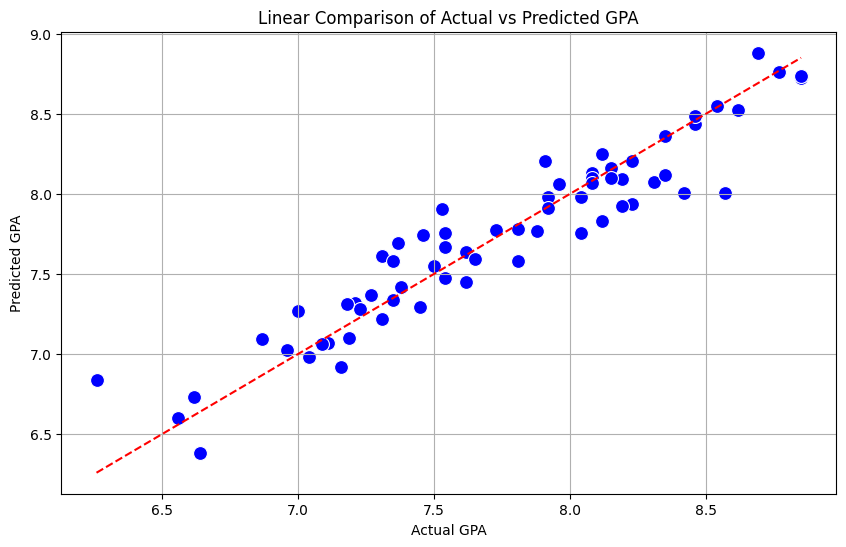

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load the dataset
data = pd.read_csv('/content/sem_result.csv')

# Assuming the file has columns 'Actual_GPA' and 'Predicted_GPA'
# If the column names differ, replace them accordingly
actual_gpa = data['GPA']
predicted_gpa = data['Predicted_GPA']

df = pd.DataFrame( {'Predicted_GPA': predicted_gpa })
print(df.max())
# Step 2: Create a scatter plot to compare actual vs predicted GPA
plt.figure(figsize=(10, 6))
sns.scatterplot(x=actual_gpa, y=predicted_gpa, color='blue', s=100)
plt.plot([min(actual_gpa), max(actual_gpa)], [min(actual_gpa), max(actual_gpa)], color='red', linestyle='--')
plt.title('Linear Comparison of Actual vs Predicted GPA')
plt.xlabel('Actual GPA')
plt.ylabel('Predicted GPA')
plt.grid(True)
plt.show()

